In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# magic function is to enable the inline plotting
%matplotlib inline 

# for display all the column in the datafarmes
pd.pandas.set_option('display.max_columns',None)

In [467]:
test = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Analyticsvidhya/main/Loan_prediction/test_lAUu6dG.csv")
train = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Analyticsvidhya/main/Loan_prediction/train_ctrUa4K.csv")

In [468]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [469]:
print('train ', train.shape)
print('test ', test.shape)

train  (614, 13)
test  (367, 12)


In [470]:
testRes = test[['Loan_ID']]
testRes

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [471]:
train.drop('Loan_ID',axis=1,inplace = True)
test.drop('Loan_ID',axis=1,inplace = True)

In [472]:
# describe basic statistics of data (including cat and num)
train.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [473]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [474]:
# to get mssing value info
mis_val =train.isna().sum()
mis_val_per = train.isna().sum()/len(train)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
Credit_History,50.0,8.1
Self_Employed,32.0,5.2
LoanAmount,22.0,3.6
Dependents,15.0,2.4
Loan_Amount_Term,14.0,2.3
Gender,13.0,2.1
Married,3.0,0.5
Education,NaN,NaN
ApplicantIncome,NaN,NaN
CoapplicantIncome,NaN,NaN


In [475]:
features = train.columns
cat = train[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']]
num =train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
for var in features:
    if len(train[var].unique()) < 6 :
        print(var,'-->',len(train[var].unique()),':', train[var].unique())
    else :
        print(var,'-->',len(train[var].unique()))

Gender --> 3 : ['Male' 'Female' nan]
Married --> 3 : ['No' 'Yes' nan]
Dependents --> 5 : ['0' '1' '2' '3+' nan]
Education --> 2 : ['Graduate' 'Not Graduate']
Self_Employed --> 3 : ['No' 'Yes' nan]
ApplicantIncome --> 505
CoapplicantIncome --> 287
LoanAmount --> 204
Loan_Amount_Term --> 11
Credit_History --> 3 : [ 1.  0. nan]
Property_Area --> 3 : ['Urban' 'Rural' 'Semiurban']
Loan_Status --> 2 : ['Y' 'N']


In [476]:
train['Dependents'].replace(to_replace='3+',value='3',inplace = True)
test['Dependents'].replace(to_replace='3+',value='3',inplace = True)

In [477]:
na_variables = [ var for var in train.columns if train[var].isnull().mean() > 0 ]

<AxesSubplot:>

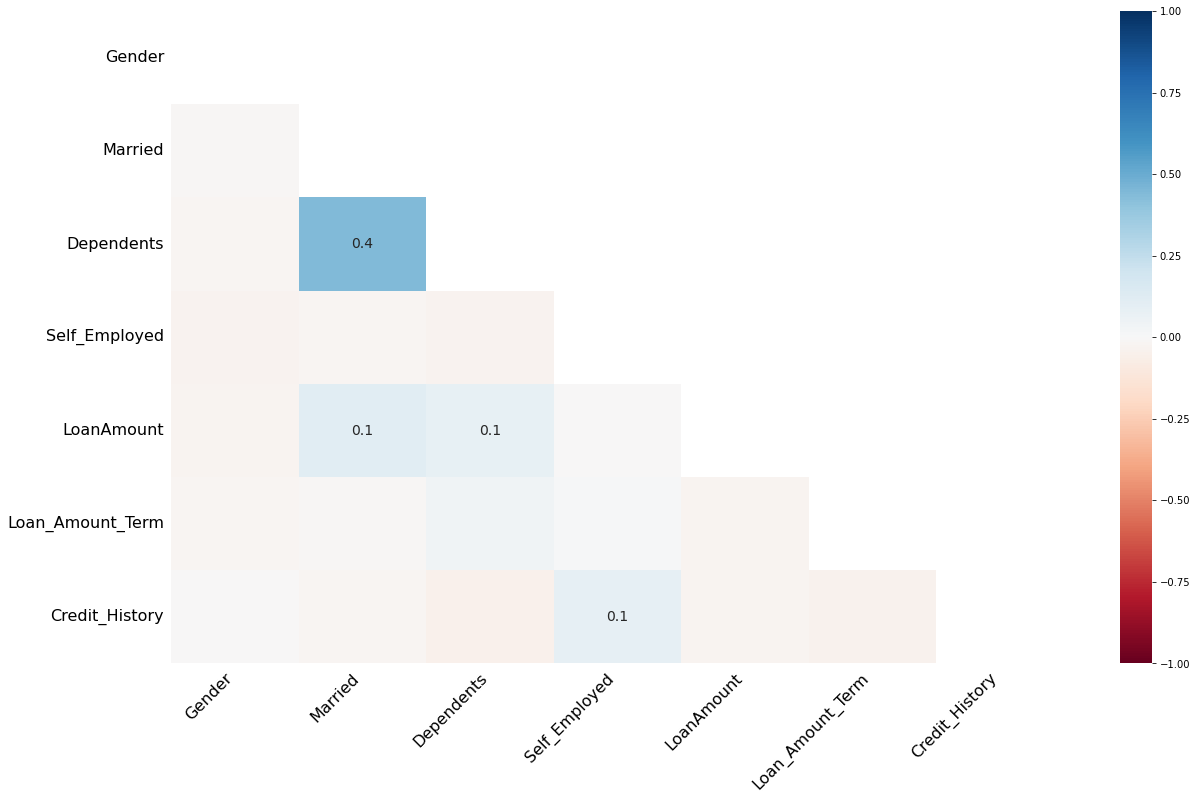

In [478]:
import missingno as msno
msno.heatmap(train)

<AxesSubplot:>

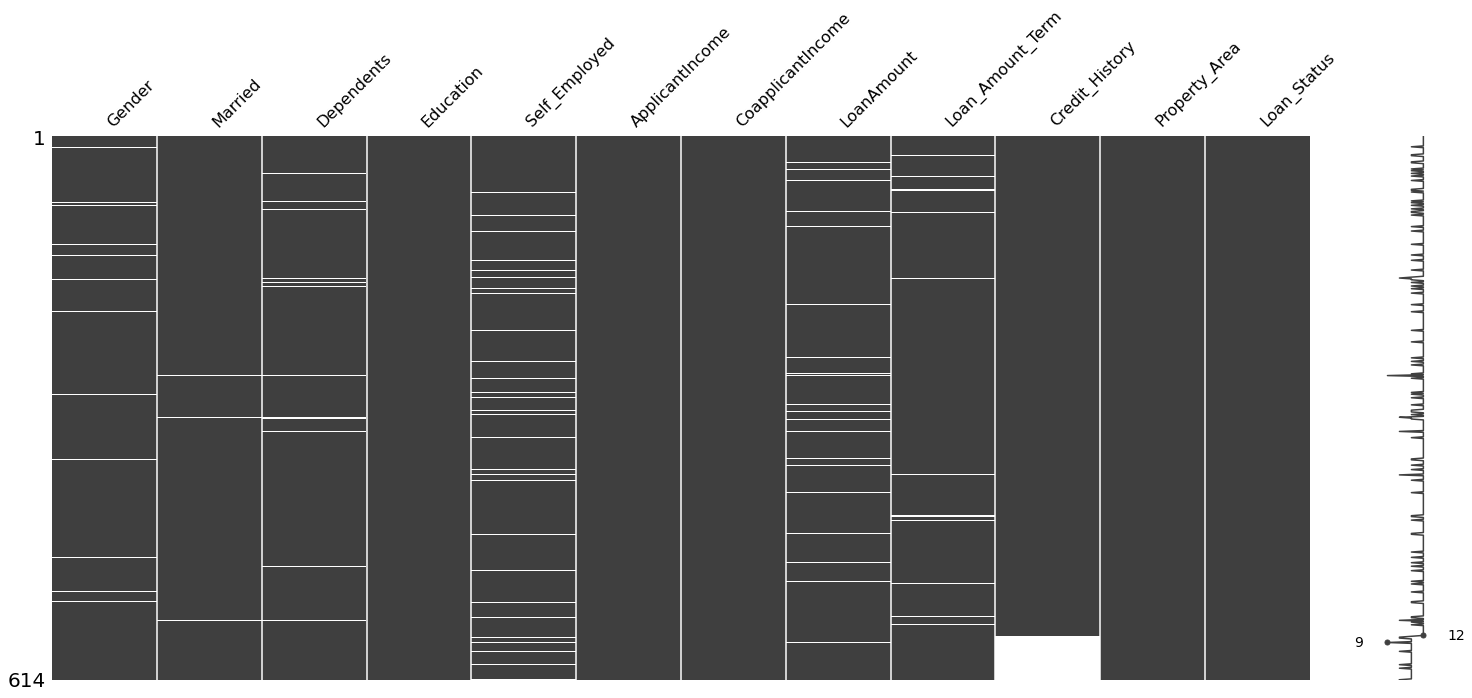

In [479]:
sorted = train.sort_values('Credit_History')
msno.matrix(sorted)

<AxesSubplot:>

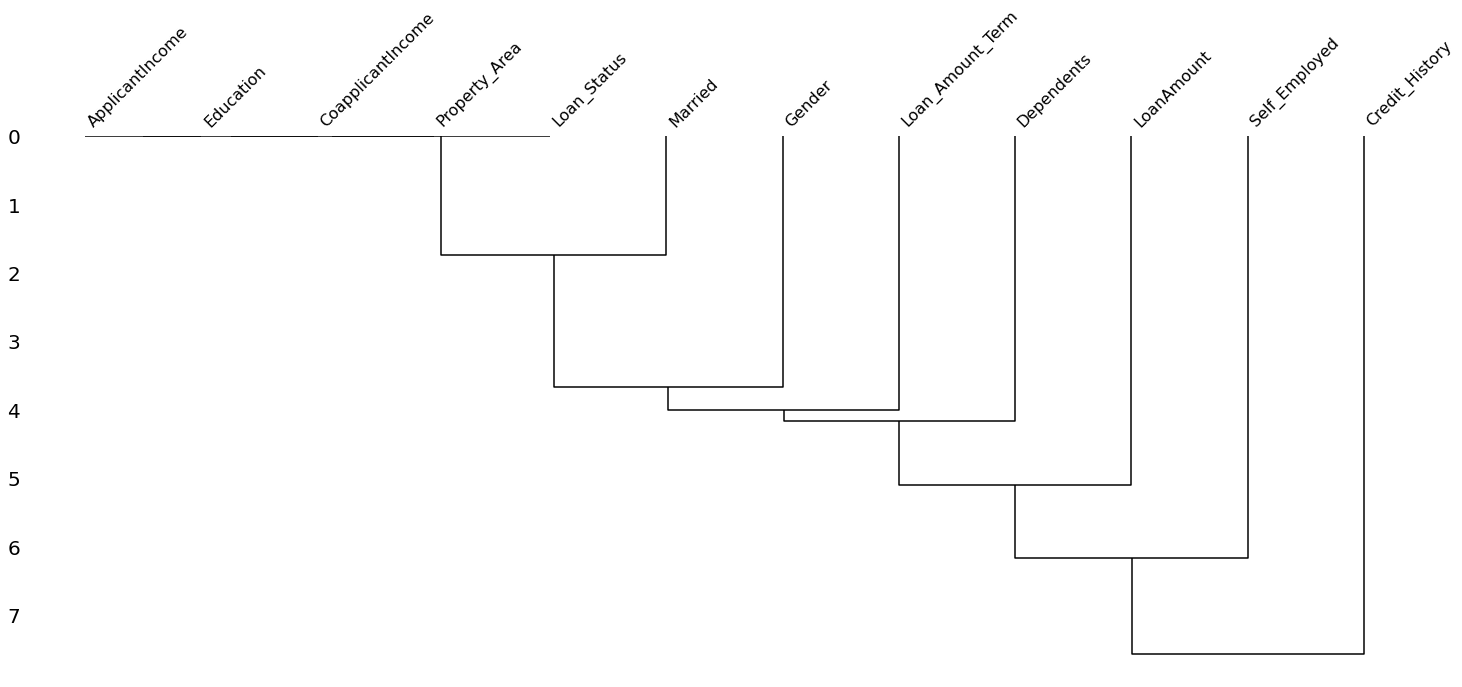

In [480]:
msno.dendrogram(train)

In [481]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)
for var in cat.columns:
    if train[var].isnull().sum() >0:
        train[var].fillna(train[var].mode()[0],inplace=True)

## Test data

test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)
for var in cat.columns:
    if test[var].isnull().sum() >0:
        test[var].fillna(test[var].mode()[0],inplace=True)

In [482]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False,drop = 'if_binary')

transformed_data = onehotencoder.fit_transform(train[['Gender']])
# the above transformed_data is an array so convert it to dataframe and add feature name to the comlum
encoded_data = pd.DataFrame(transformed_data, columns=onehotencoder.get_feature_names_out())

# now concatenate the original data and the encoded data using pandas
train = pd.concat([train, encoded_data], axis=1).drop('Gender', axis=1)

## Test data

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False,drop = 'if_binary')

transformed_data = onehotencoder.fit_transform(test[['Gender']])
# the above transformed_data is an array so convert it to dataframe and add feature name to the comlum
encoded_data = pd.DataFrame(transformed_data, columns=onehotencoder.get_feature_names_out())

# now concatenate the original data and the encoded data using pandas
test = pd.concat([test, encoded_data], axis=1).drop('Gender', axis=1)

In [483]:
label_en = []
for var in test.columns:
    if len(test[var].unique()) < 6 :
        label_en.append(var)
        
label_en.pop()

'Gender_Male'

In [484]:
from sklearn.preprocessing import LabelEncoder
feature_col = label_en
le = LabelEncoder()
for col in feature_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

Loan_Status_dict = {'N':0, 'Y':1}
train['Loan_Status'] = train['Loan_Status'].map(Loan_Status_dict)

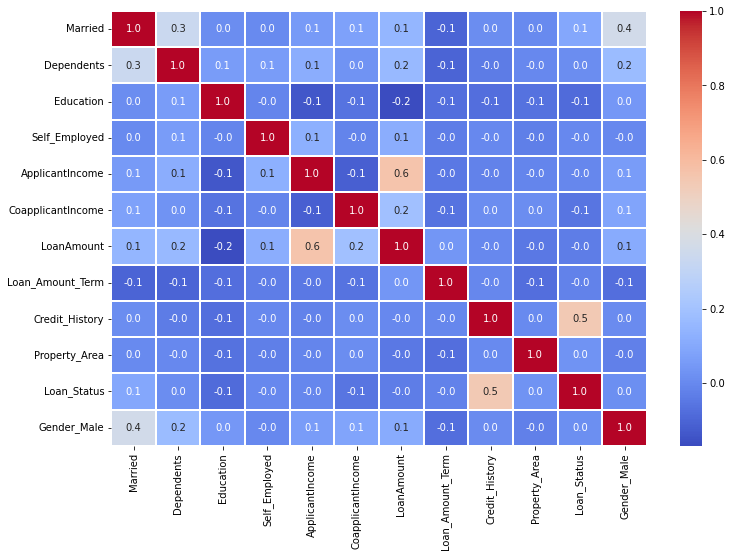

In [485]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [486]:
train.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_Male'],
      dtype='object')

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


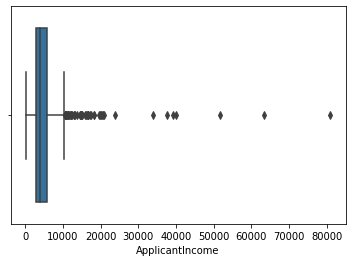

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


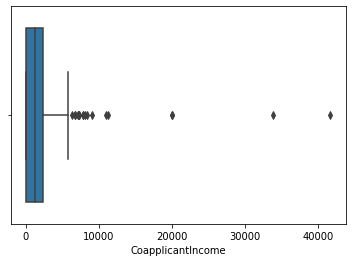

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


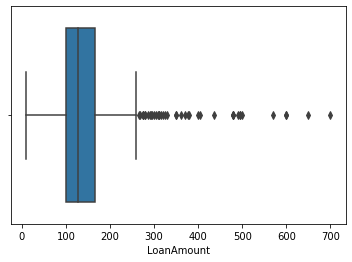

In [487]:
for var in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.boxplot(train[var])
    plt.show()

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


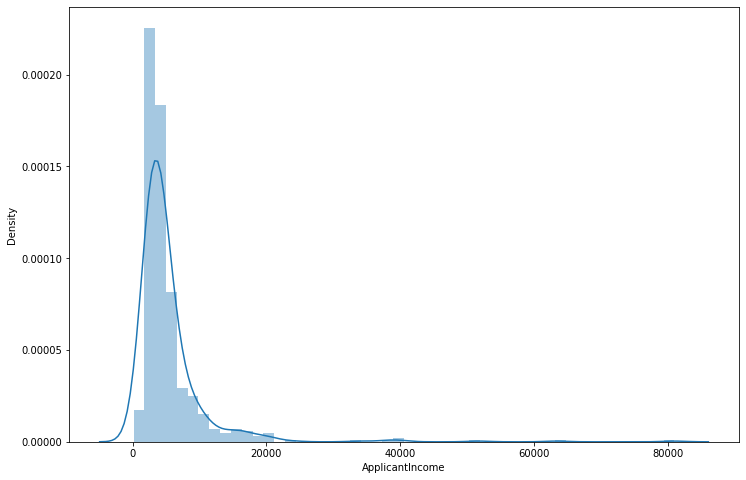

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


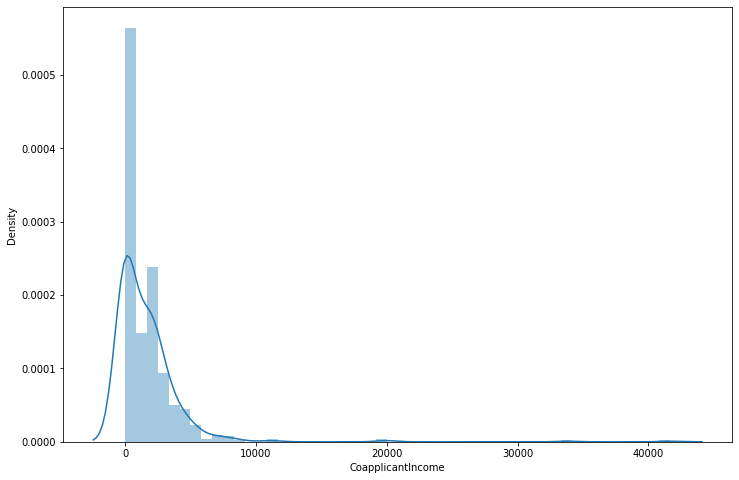

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


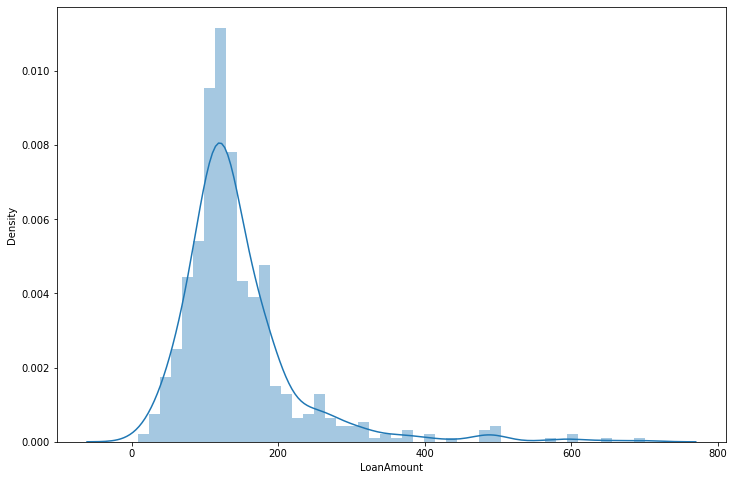

In [488]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    fig= plt.subplots(figsize=(12, 8))
    sns.distplot(train[i])
    plt.show()

In [489]:
for var in ['ApplicantIncome','CoapplicantIncome','LoanAmount'] :
    q10 = train[var].quantile(0.10)
    q90 = train[var].quantile(0.90)
    train[var] = np.where(train[var] <q10, q10,train[var])
    train[var] = np.where(train[var] >q90, q90,train[var])
    test[var] = np.where(test[var] <q10, q10,test[var])
    test[var] = np.where(test[var] >q90, q90,test[var])

In [490]:
"""for var in ['ApplicantIncome','CoapplicantIncome','LoanAmount'] :
    q10 = test[var].quantile(0.10)
    q90 = test[var].quantile(0.90)
    test[var] = np.where(test[var] <q10, q10,test[var])
    test[var] = np.where(test[var] >q90, q90,test[var])"""

"for var in ['ApplicantIncome','CoapplicantIncome','LoanAmount'] :\n    q10 = test[var].quantile(0.10)\n    q90 = test[var].quantile(0.90)\n    test[var] = np.where(test[var] <q10, q10,test[var])\n    test[var] = np.where(test[var] >q90, q90,test[var])"

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


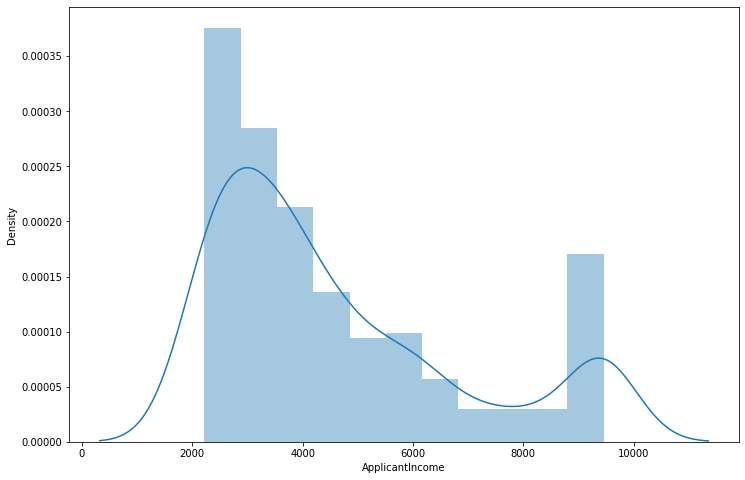

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


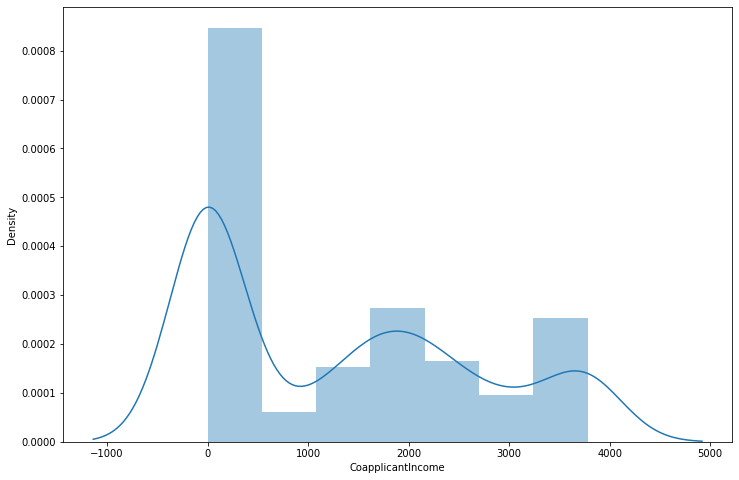

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


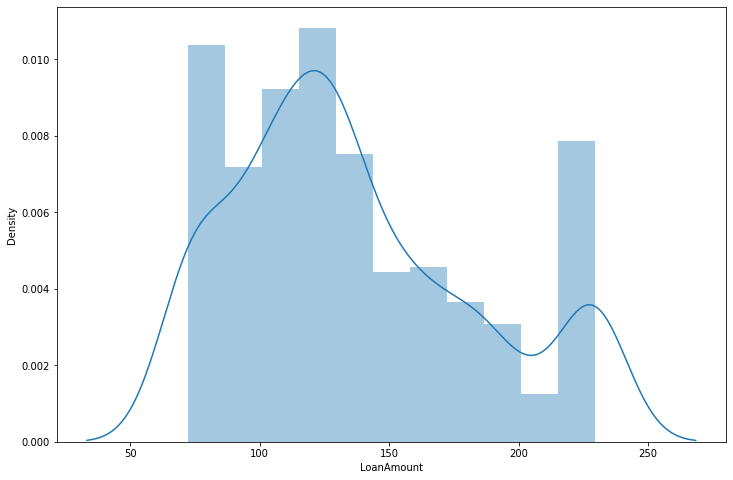

In [491]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    fig= plt.subplots(figsize=(12, 8))
    sns.distplot(train[i])
    plt.show()

In [492]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
na_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for var in na_features:
    train[var] = scaler.fit_transform(train[var].values.reshape(-1, 1))
    test[var] = scaler.transform(test[var].values.reshape(-1, 1))

In [493]:
train.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_Male'],
      dtype='object')

In [494]:
from sklearn.model_selection import train_test_split
X = train.drop(['Loan_Status'], axis=1)
y = train[['Loan_Status']]
X_test = test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [495]:
from collections import OrderedDict
model_performance = OrderedDict()

In [509]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=1)
lg_model = logistic_model.fit(X_train,y_train)

y_pred_logistic=lg_model.predict(X_val)

score_logistic =accuracy_score(y_pred_logistic,y_val)*100

model_performance['Multi Linear Regression'] = round(score_logistic,3)
print(f'Root Mean Squared Error of the model is : {round(score_logistic,3)}')

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Root Mean Squared Error of the model is : 78.862


In [510]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train,y_train)
pred_cv_tree=tree_model.predict(X_val)
score_tree =accuracy_score(pred_cv_tree,y_val)*100 

model_performance['Decision Tree'] = round(score_tree,3)
print(f'Root Mean Squared Error of the model is : {round(score_tree,3)}')

Root Mean Squared Error of the model is : 72.358


In [511]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(X_train,y_train)
pred_cv_forest=forest_model.predict(X_val)
score_forest = accuracy_score(pred_cv_forest,y_val)*100
model_performance['Random Forest_10'] = round(score_forest,3)
print(f'Root Mean Squared Error of the model is : {round(score_forest,3)}')

C:\Users\Nik\AppData\Local\Temp\ipykernel_9756\4191054610.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train,y_train)


Root Mean Squared Error of the model is : 78.049


In [499]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Nik\AppData\Local\Programs\Python\Pyt

RandomForestClassifier(max_depth=9, n_estimators=61, random_state=1)

In [512]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=9,n_estimators=161)
grid_forest_model.fit(X_train,y_train)
pred_grid_forest = grid_forest_model.predict(X_val)
score_grid_forest = accuracy_score(pred_grid_forest,y_val)*100
model_performance['Random Forest with Grid-search'] = round(score_grid_forest,3)
print(f'Root Mean Squared Error of the model is : {round(score_grid_forest,3)}')

C:\Users\Nik\AppData\Local\Temp\ipykernel_9756\846051837.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  grid_forest_model.fit(X_train,y_train)


Root Mean Squared Error of the model is : 78.862


In [513]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,max_depth=4) 
xgb_model.fit(X_train,y_train)
pred_xgb=xgb_model.predict(X_val)
score_xgb = accuracy_score(pred_xgb,y_val)*100
model_performance['XGBoost'] = round(score_xgb,3)
print(f'Root Mean Squared Error of the model is : {round(score_xgb,3)}')

Root Mean Squared Error of the model is : 75.61


In [514]:
model_performance

OrderedDict([('Multi Linear Regression', 78.862),
             ('Decision Tree', 72.358),
             ('Random Forest_10', 78.049),
             ('Random Forest with Grid-search', 78.862),
             ('XGBoost', 75.61)])

In [503]:
yPreds = grid_forest_model.predict(X_test)
testRes['Loan_Status'] = yPreds


In [505]:
Loan_Status_dict_1= {0:'N', 1:'Y'}
testRes['Loan_Status'] = testRes['Loan_Status'].map(Loan_Status_dict_1)

submission = testRes[['Loan_ID', 'Loan_Status']]
submission.columns = ['Loan_ID','Loan_Status']
submission.to_csv('submission_v1.csv', index = False)
submission.head()